Import Libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Loading Dataset

In [14]:
housing=pd.read_csv(r"C:\Users\umite\Desktop\vs_yapay_zeka\paris_housing_price\paris_housing_price.csv")
housing.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


Dataset Shape

In [15]:
housing.shape

(22730, 18)

Dataset Information

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

Numerical Features

In [18]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22730.0,1.136450e+04,6.561730e+03,0.0,5682.25,11364.5,17046.75,22729.0
squareMeters,22730.0,4.658622e+04,4.952124e+04,89.0,20392.75,44484.0,71547.00,6071330.0
numberOfRooms,22730.0,4.824109e+01,2.822643e+01,1.0,25.00,47.0,75.00,100.0
hasYard,22730.0,4.758909e-01,4.994294e-01,0.0,0.00,0.0,1.00,1.0
hasPool,22730.0,4.527497e-01,4.977733e-01,0.0,0.00,0.0,1.00,1.0
floors,22730.0,4.730598e+01,4.777721e+01,1.0,25.00,45.0,69.00,6000.0
cityCode,22730.0,5.001380e+04,3.000664e+04,3.0,22936.00,50414.0,76291.00,491100.0
cityPartRange,22730.0,5.585042e+00,2.739533e+00,1.0,3.00,6.0,8.00,10.0
numPrevOwners,22730.0,5.620766e+00,2.713026e+00,1.0,3.00,6.0,8.00,10.0
made,22730.0,2.008005e+03,1.188268e+02,1990.0,2000.00,2006.0,2014.00,10000.0


Heatmap of Null Values

<AxesSubplot:>

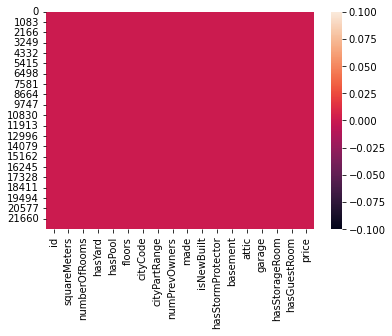

In [21]:
sns.heatmap(housing.isnull())

In [22]:
# We don't have null value.

Dropping 'id' Column

In [23]:
housing=housing.drop("id",axis=1)

Choosing 'X' and 'y' Columns

In [25]:
X=housing.drop("price",axis=1)
y=housing["price"]

Splitting Train and Test Set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Creating 'GridSearchCV' Structure with 'GradientBoostingRegressor'

In [31]:
model = GradientBoostingRegressor()
params = {
    
    "learning_rate": [0.01, 0.1],

    "max_depth":[3,5,8],
   
    "criterion": ["mse"],
    "subsample":[0.5, 1.0],
    "n_estimators":[10,50]
    }

clf = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=2,
    n_jobs=5,
    verbose=1
)

Fitting Models

In [32]:
clf.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=5,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 8], 'n_estimators': [10, 50],
                         'subsample': [0.5, 1.0]},
             verbose=1)

Printing Best Parameters

In [33]:
print(clf.best_params_)

{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}


Getting New Model with Best Parameter

In [34]:
model = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=50,subsample=1)

Fitting Best Parameter Model

In [35]:
model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50, subsample=1)

Making Predictions

In [37]:
y_preds=model.predict(X_test)
y_preds

array([5074213.59492846, 7574765.9224756 , 8883759.89287668, ...,
       3652101.39066969,  242479.95324044, 8663416.62364598])

'mape' Function to Evaluate Prediction of Model

In [38]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [39]:
mape(y_test,y_preds)

0.03368973695526293

In [40]:
# We have % 0.33 mean absolute percentage error.